<a href="https://colab.research.google.com/github/payal500/gen-ai/blob/main/gen_ai_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

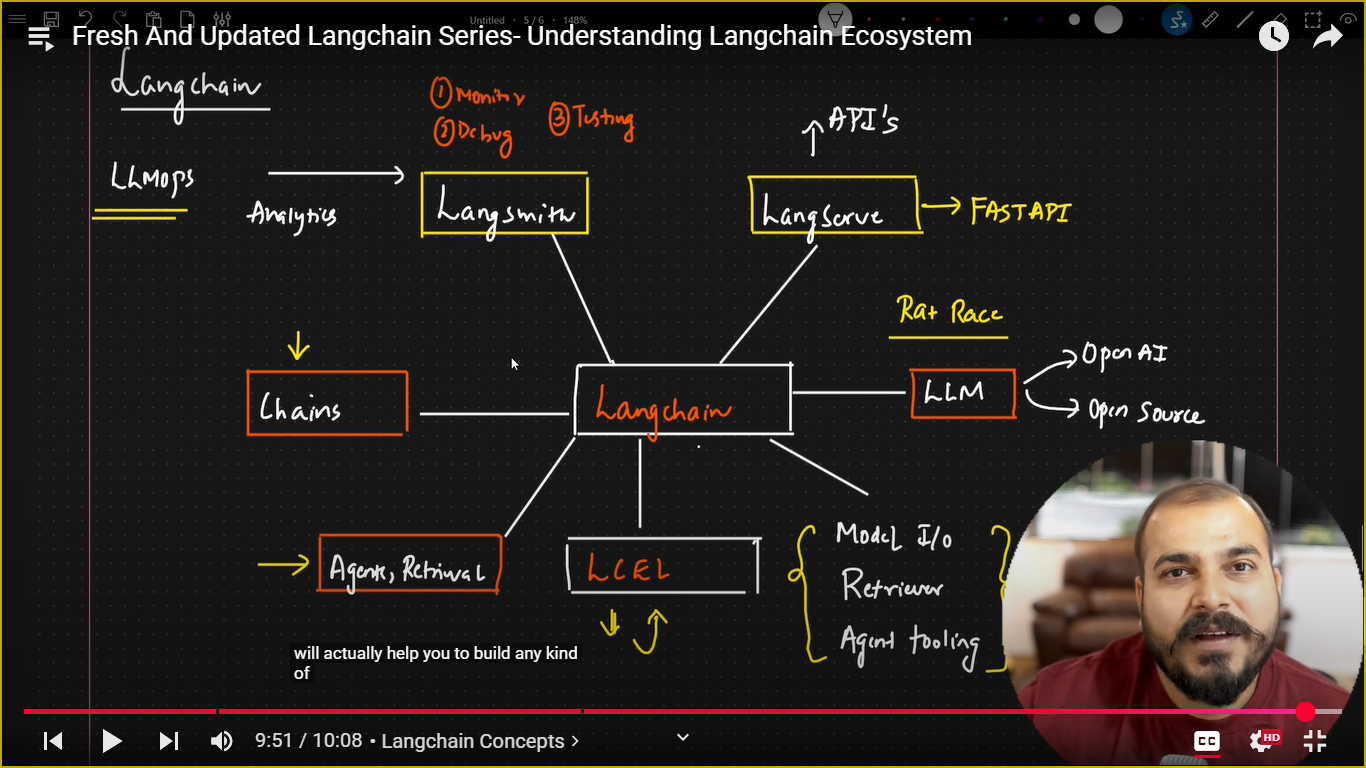

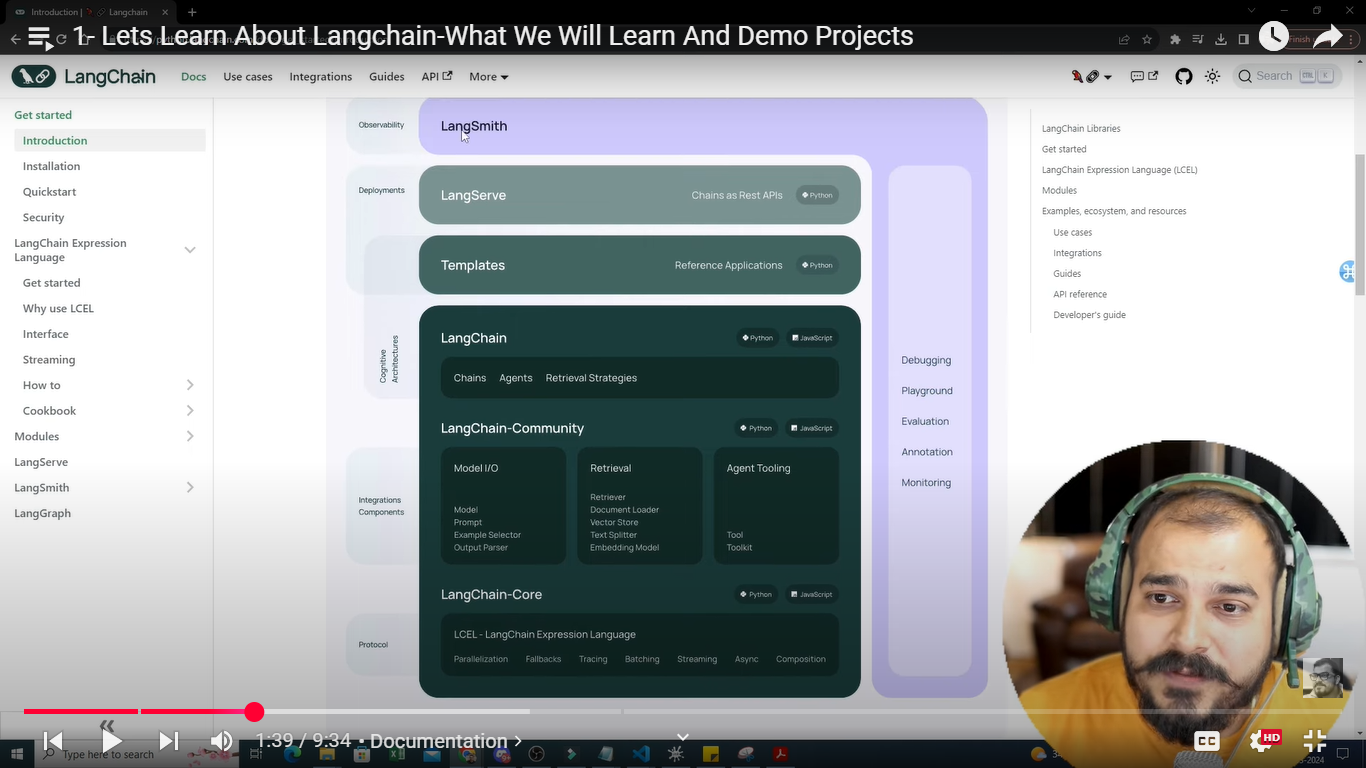

In [ ]:
!pip install langchain-openai


**LangChain** is a Python (and JS) framework to build applications that use large language models (LLMs), like GPT-4, in a more structured, powerful, and modular way.

Instead of calling the LLM directly every time (which can get messy as logic grows), LangChain provides building blocks to manage:

Prompt creation

Memory (conversation history)

Chains (pipelines of operations)

Tools (API calls, search engines, etc.)

Agents (LLM-powered decision makers)

Retrieval Augmented Generation (RAG)

Integrations (OpenAI, Azure, HuggingFace, Vector DBs like Pinecone, FAISS, Chroma)



**Why do we use LangChain?**

Without LangChain
➡ You write raw API calls, manually build prompts, parse outputs, manage conversation history, handle context windows, etc.

With LangChain
✅ You get pre-built tools to handle all of that.

**What is an LLM?**

LLM = Large Language Model

A type of AI model trained on huge amounts of text data (books, internet, code, etc).

It can understand and generate human-like language.

Popular LLMs: GPT-4, GPT-4o, GPT-3.5, Claude, Gemini, LLaMA, Mistral, etc.

At the core, LLMs take text input (prompt) → predict next words → generate text output.

**Why use LLMs?**

LLMs can:

✅ Understand natural language

✅ Generate natural language

✅ Answer questions

✅ Summarize text

✅ Translate languages

✅ Generate code

✅ Perform reasoning

✅ Extract information

✅ Interact with APIs and tools (when combined with frameworks like LangChain)

LLMs basically allow machines to understand and work with language — which was very hard for traditional software.



In [ ]:
#ChatOpenAI is a wrapper class provided by LangChain to interact with OpenAI's chat models like gpt-3.5-turbo, gpt-4o, etc.
from langchain_openai import ChatOpenAI
#It helps you build structured prompts for LLMs, especially when you want to format input with variables.Instead of manually creating big string prompts, you use templates with placeholders
from langchain_core.prompts import ChatPromptTemplate
#StrOutputParser-	Output parser-	Extract clean text from model responses
#StrOutputParser converts (parses) the response into a simple Python string.
from langchain_core.output_parsers import StrOutputParser


In [ ]:
import streamlit as st
import os
from dotenv import load_dotenv

**What is dotenv?**
dotenv is a Python package (official name: python-dotenv) used to load environment variables from a .env file into your Python environment.

It helps you securely store sensitive data like:

API keys

Database credentials

Secret tokens

Configuration values


**Why use it?**

✅ Avoid hardcoding secrets in your Python code.

✅ Separate code and configuration (good practice).

✅ Makes your code portable across dev/stage/prod environments.

In [ ]:
#You are reading the API key from existing env variables and explicitly setting it into os.environ
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
## Langmith tracking
#You’re turning on LangChain's advanced logging & debugging system (LangSmith) to track what happens inside your chains, prompts, LLM calls, etc.
os.environ["LANGCHAIN_TRACING_V2"]="true"
#You are securely setting your LangSmith API key into environment variables, so LangChain can authenticate and send your tracing data for debugging & monitoring.
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")

In [ ]:
## Prompt Template

prompt=ChatPromptTemplate.from_messages(
    [
        ("system","You are a helpful assistant. Please response to the user queries"),
        ("user","Question:{question}")
    ]
)


In [ ]:
## streamlit framework

st.title('Langchain Demo With OPENAI API')
input_text=st.text_input("Search the topic u want")

# openAI LLm
#You just created a GPT-3.5 instance that LangChain can talk to.
llm=ChatOpenAI(model="gpt-3.5-turbo")
#LangChain utility that extracts plain string text from the LLM response.
output_parser=StrOutputParser()
#You now have a complete processing pipeline, also called a Chain in LangChain.
chain=prompt|llm|output_parser

if input_text:
    st.write(chain.invoke({'question':input_text}))

In [ ]:
#output

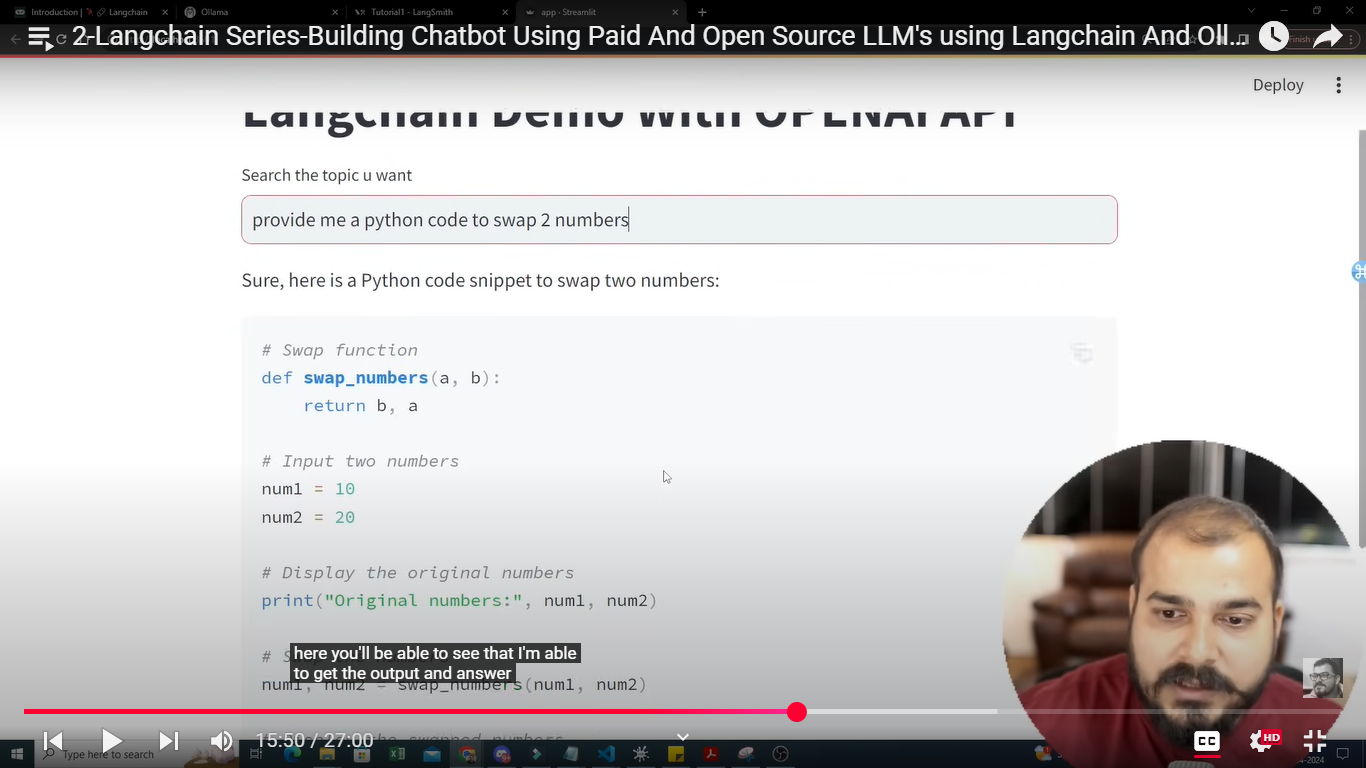

# creating a demo using open-source LLMs locally -Ollama

**Ollama**

lets you run your own ChatGPT-like models fully offline on your machine, with full privacy, zero cost per call, and full control over which open-source model you use.

A framework to run LLMs locally on your own machine (laptop, server, cloud instance).

You can run models like LLaMA 3, Mistral, Phi, Gemma, Mixtral, etc.

You don't need to send data to OpenAI, Google, or any cloud — you run the models fully on your own hardware.

In [ ]:
#difference in paid and open source model is like model difference in open ai paid we use gpt and in open source ollama we use llaama2
#we have to import ollama
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_community.llms import Ollama
import streamlit as st
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")

## Prompt Template

prompt=ChatPromptTemplate.from_messages(
    [
        ("system","You are a helpful assistant. Please response to the user queries"),
        ("user","Question:{question}")
    ]
)
## streamlit framework

st.title('Langchain Demo With LLAMA2 API')
input_text=st.text_input("Search the topic u want")

# ollama LLAma2 LLm
#need to download the model locally first like ollama run llama2
llm=Ollama(model="llama2")
output_parser=StrOutputParser()
chain=prompt|llm|output_parser

if input_text:
    st.write(chain.invoke({"question":input_text}))